<h1 style="text-align:center;">ESCUELA POLITECNICA NACIONAL</h1>
<h2 style="text-align:center;">FACULTAD DE INGENIERIA DE SISTEMAS</h2>
<h3 style="text-align:center;">INGENIERIA EN CIENCIAS DE LA COMPUTACION</h3>

**PERIODO ACADEMICO:** 2025-B 

**ASIGNATURA:** ICCD412 Métodos Numéricos 

**GRUPO:** GR1  

**FECHA DE ENTREGA LIMITE:** 05/11/2025   

**ALUMNO:** Carrion Mauricio 

**TAREA 5**

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable
import sympy as sym
from scipy.optimize import newton, bisect
import math


### CONJUNTO DE EJERCICIOS

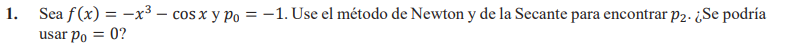

Para newton, necesitamos la derivada de la función anterior. Como resultado: $f'(x) = -3x^2 + \sin{x}$

Llamamos a la función Newton con los parámetros que tenemos:

In [31]:
def fprime(x):
    return -3*x**2 + math.sin(x)

p1 = newton(func = lambda x : -x**3 - math.cos(x), x0 = -1, fprime = fprime)
print(p1)

-0.8654740331016144


Y para la secante no necesitamos la derivada:

In [32]:
p1 = newton(func = lambda x : -x**3 - math.cos(x), x0 = -1)
print(p1)

-0.8654740331016144


Como punto aproximado es una mala elección por eso para newton implica que en $p_0 = 0$ la derivada sea cero, algo no permitido mientras que en la secante el punto produce complicaciones por la presencia de multiplicaciones para cero.

In [33]:
p1 = newton(func = lambda x : -x**3 - math.cos(x), x0 = 0)
print(p1)

-4.998000183473029e-09


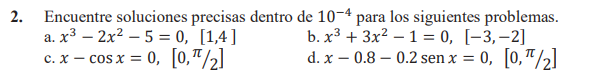

a) $x^3 - 2x^2 - 5 = 0$, $[1, 4]$

Con secante podemos obtener:

In [34]:
p1 = newton(func = lambda x : x**3 - 2*x**2 - 5, x0 = 1, tol = 10e-4, x1 = 4)
print(p1)

2.6906484961992585


b) $x^3 + 3x^2 - 1 = 0$, $[-3, -2]$

In [35]:
p1 = newton(func = lambda x : x**3 + 3*x**2 - 1, x0 = -3, tol = 10e-4, x1 = -2)
print(p1)

-2.879385194736809


c) $x - \cos{x} = 0$, $[0, \frac{\pi}{2}]$

In [36]:
p1 = newton(func = lambda x : x - math.cos(x), x0 = 0, tol = 10e-4, x1 = math.pi/2)
print(p1)

0.7390834365030763


d) $x - 0.8 - 0.2\sin{x} = 0$, $[0, \frac{\pi}{2}]$

In [37]:
p1 = newton(func = lambda x : x - 0.8 - 0.2*math.sin(x), x0 = 0, tol = 10e-4, x1 = math.pi/2)
print(p1)

0.9643338835706312


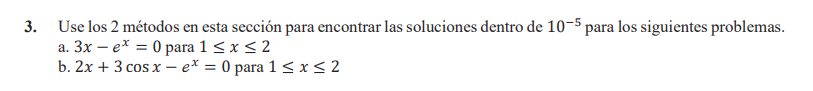

a) $3x - e^{x} = 0$ para $1 \leq x \leq 2$ 

Primero calculamos la derivada de la función: $3 - e^{x}$

In [38]:
p1 = newton(func = lambda x : 3*x - math.exp(x), x0 = 1, fprime = lambda x : 3 - math.exp(x), tol = 10e-5, x1 = 2)
print(p1)

0.6190612833553127


Ahora el segundo método en usar sera el de la secante:

In [39]:
p1 = newton(func = lambda x : 3*x - math.exp(x), x0 = 1, tol = 10e-5, x1 = 2)
print(p1)

1.5121345517620621


Los dos encontraron raíces diferentes esto es porque newton encontró una fuera del intervalo dado debido a los puntos dados y a su vez la pendiente convergía hacia la izquierda.

b) $2x + 3\cos{x} - e^{x} = 0$ para $1 \leq x \leq 2$

Primero calculamos la derivada de la función: $2 - 3\sin{x} - e^{x}$

In [40]:
p1 = newton(func = lambda x : 2*x + 3*math.cos(x) - math.exp(x), x0 = 1,fprime = lambda x : 2 - 3*math.sin(x) - math.exp(x), tol = 10e-5, x1 = 2)
print(p1)

1.2397146979752596


Ahora el método de la secante:

In [41]:
p1 = newton(func = lambda x : 2*x + 3*math.cos(x) - math.exp(x), x0 = 1, tol = 10e-5, x1 = 2)
print(p1)

1.2397146920815107


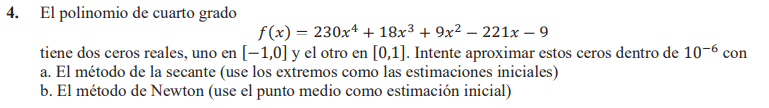

a) El método de la secante

Para el primer intervalo $[-1, 0]$:

In [42]:
p1 = newton(func = lambda x : 230*x**4 + 18*x**3 + 9*x**2 - 221*x - 9, x0 = -1, tol = 10e-6, x1 = 0)
print(p1)

-0.04065928497591696


Para el segundo intervalo $[0, 1]$:

In [43]:
p1 = newton(func = lambda x : 230*x**4 + 18*x**3 + 9*x**2 - 221*x - 9, x0 = 1, tol = 10e-6)
print(p1)

0.9623984191155153


b) El método de Newton

Primero empezamos sacando su derivada: $920x^3 + 54x^2 + 18x - 221$

Como se solicita un punto medio de estimación inicial, para el primer intervalo $[-1, 0]$ con su mediana $-0.5$:

In [44]:
p1 = newton(func = lambda x : 230*x**4 + 18*x**3 + 9*x**2 - 221*x - 9, x0 = -0.5, fprime = lambda x : 920*x**3 + 54*x**2 + 18*x -221, tol = 10e-6)
print(p1)

-0.04065928831575899


Para el segundo intervalo $[0, 1]$ de igual manera usaremos $1$

In [45]:
p1 = newton(func = lambda x : 230*x**4 + 18*x**3 + 9*x**2 - 221*x - 9, x0 = 1, fprime = lambda x : 920*x**3 + 54*x**2 + 18*x -221,  tol = 10e-6)
print(p1)

0.9623984187505414


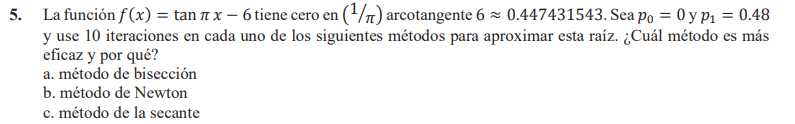

a) Método de bisección

Ahora procedemos a usar el método de bisección con los datos dados:

In [46]:
r = bisect(f=lambda x: math.tan(math.pi*x) - 6, a=0, b=0.48, xtol=2e-12, maxiter=10, full_output=False)
print(f"Raíz: {r}")

RuntimeError: Failed to converge after 10 iterations.

El metodo de biseccion no logra converger a la raiz en el intervalo dado.

b) Método de Newton

Como siempre primero necesitamos su derivada: $\pi \sec^2{\pi x}$ y usamos el algoritmo,

In [47]:
p1 = newton(func = lambda x : math.tan(math.pi*x) - 6, x0 = 0, fprime = lambda x : math.pi*(1/math.cos(math.pi*x))**2, maxiter = 10, x1 = 0.48)
print(p1)

RuntimeError: Failed to converge after 10 iterations, value is 13.655012218324751.

Los errores comentan que la pendiente tiende a converger hacia los valores mínimos.

c) Método de la Secante

Usamos el algoritmo con los parámetros:

In [ ]:
p1 = newton(func = lambda x : math.tan(math.pi*x) - 6, x0 = 0, maxiter = 10, x1 = 0.48)
print(p1)

RuntimeError: Failed to converge after 10 iterations, value is -3694.358600967476.

Los métodos newton y secante tienden a manejarse en cuanto a pendiente o a una línea que entre corta el eje x lo que genera que en cálculos se salen del intervalo, destacar tambien que otra razón es la propia función porque no es continua respecto a los reales.

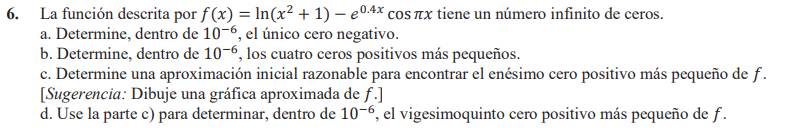

a) Determine, dentro de $10^{-6}$, el único cero negativo.

Utilizamos método de la secante:

In [ ]:
p1 = newton(func = lambda x : math.log(x**2 + 1) - math.exp(0.4*x)*math.cos(math.pi*x), x0 = -0.4, tol = 10e-6)
print(p1)

-0.43414304724770203


b) Determine, dentro de $10^{-6}$, los cuatro ceros positivos más pequeños.

Por método de la secante:

In [ ]:
p1 = newton(func = lambda x : math.log(x**2 + 1) - math.exp(0.4*x)*math.cos(math.pi*x), x0 = 0.5, tol = 10e-6)
print(p1)

0.4506567478906115


In [ ]:
p1 = newton(func = lambda x : math.log(x**2 + 1) - math.exp(0.4*x)*math.cos(math.pi*x), x0 = 1.5, tol = 10e-6)
print(p1)

1.7447380533760186


In [ ]:
p1 = newton(func = lambda x : math.log(x**2 + 1) - math.exp(0.4*x)*math.cos(math.pi*x), x0 = 2.5, tol = 10e-6)
print(p1)

2.2383197950776066


In [ ]:
p1 = newton(func = lambda x : math.log(x**2 + 1) - math.exp(0.4*x)*math.cos(math.pi*x), x0 = 3.5, tol = 10e-6)
print(p1)

3.7090412014166936


c) Determine una aproximación inicial razonable para encontrar el enésimo cero positivo más pequeño de $f$

Utilizamos geogebra para visualizar la función,

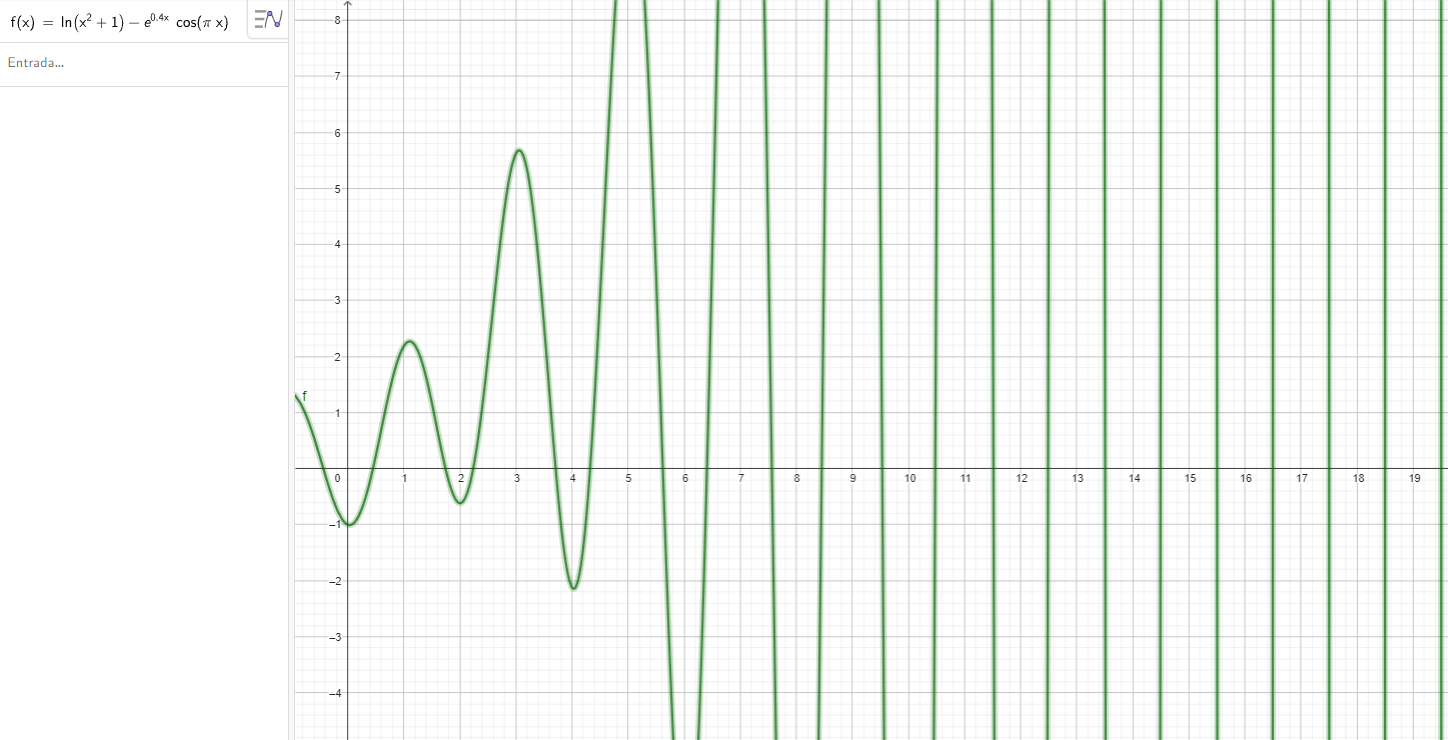

Existen infinitas raíces positivas según el gráfico la función pero podemos observar que las raíces tienden a estar cerca de un número entero 0.5 por lo que podemos usar esto como punto de aproximación para encontrar la enésima raíz de esta función.

La fórmula dada es: $n - 0.5$, tal que $n$ representa una aproximación a la enésima raíz positiva $n \in \mathbb{N} - \{0\}$.

Asi que empleamos método de la secante y tenemos:

In [ ]:
p1 = newton(func = lambda x : math.log(x**2 + 1) - math.exp(0.4*x)*math.cos(math.pi*x), x0 = 24.5, tol = 10e-6)
print(p1)

24.49988704757148


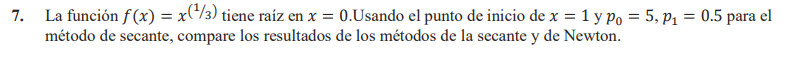

Empezamos con el método de la secante:

In [48]:
p1 = newton(func = lambda x : x**(1/3) + 1, x0 = 1)
print(p1)

C:\Users\mauri\AppData\Local\Temp\ipykernel_22768\4142060945.py:1: RuntimeWarning: invalid value encountered in scalar power
  p1 = newton(func = lambda x : x**(1/3) + 1, x0 = 1)


RuntimeError: Failed to converge after 50 iterations, value is nan.

Con método de newton debemos obtener la derivada entonces: $\frac{1}{3x^{\frac{2}{3}}}$. 

Llamados a la función de Newton:

In [49]:
p1 = newton(func = lambda x : x**(1/3), x0 = 1, fprime = lambda x : 1 / (3*x**(2/3)))
print(p1)

C:\Users\mauri\AppData\Local\Temp\ipykernel_22768\2327556776.py:1: RuntimeWarning: invalid value encountered in scalar power
  p1 = newton(func = lambda x : x**(1/3), x0 = 1, fprime = lambda x : 1 / (3*x**(2/3)))


RuntimeError: Failed to converge after 50 iterations, value is nan.

En ambos casos existe el error de no convergencia esto se genera básicamente por el cero. Además solo existe una única raíz existente para esa función que tiene una pendiente igual a cero 0.